### Questions to answer:
What is the cause of most train delays.
To answer this question we use the columns with % train late due REASON

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data and show first 5 rows (all columns)
df = pd.read_csv('Regularities_by_liaisons_Trains_France.csv')
pd.set_option("display.max_columns", None)
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [3]:
# Filter the data needed
df_filtered = df[['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)', 
    '% trains late due to railway infrastructure (maintenance, works)', 
    '% trains late due to traffic management (rail line traffic, network interactions)', 
    '% trains late due to rolling stock', 
    '% trains late due to station management and reuse of material', 
    '% trains late due to passenger traffic (affluence, PSH management, connections)']] 
df_filtered.head()

,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)"
0,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000
1,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444
2,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529
3,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923
4,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154


In [17]:
# find out the number of NaNs
number_columns_nulls = len(set(df_filtered.columns[df_filtered.isnull().mean()>0]))
number_of_rows_nan = df_filtered[df_filtered.isnull().all(axis=1)].shape

In [18]:
print('Number of columns with null values', number_columns_nulls)
print('Number of rows with all NaN values:', number_of_rows_nan[0])

Number of columns with null values 6
Number of rows with all NaN values: 271


### Observations
There could be two reasons for 271 rows with NaN values.
1. The reasons why the train is late is never known
2. There is another reason why the train is late, besides the six already mentioned.

First reason sounds most logical, because when there would be another reason why the train is late I would expect 0.0 instead of NaN. 
Besides that, why would they not add a column with % train late due to another reason if you know there are other reasons.

### Conclusion
Because we probably do not know why the train is late and every traject is different, the rows with all NaNs will be dropped

In [23]:
# Drop rows with all NaNs
df_filtered = df_filtered.dropna(how='all')

In [24]:
# Check
number_columns_nulls = len(set(df_filtered.columns[df_filtered.isnull().mean()>0]))
number_of_rows_nan = df_filtered[df_filtered.isnull().all(axis=1)].shape

In [25]:
print('Number of columns with null values', number_columns_nulls)
print('Number of rows with all NaN values:', number_of_rows_nan[0])

Number of columns with null values 0
Number of rows with all NaN values: 0


### conclusion
With dropping the rows with all NaNs there are no NaNs in the filtered dataset anymore

In [52]:
# 
all_columns = ['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)', 
    '% trains late due to railway infrastructure (maintenance, works)', 
    '% trains late due to traffic management (rail line traffic, network interactions)', 
    '% trains late due to rolling stock', 
    '% trains late due to station management and reuse of material', 
    '% trains late due to passenger traffic (affluence, PSH management, connections)']
total_percentage = []
for column in all_columns:
    total_column = df[column].sum()
    total_percentage.append(total_column)
total_percentage_all = sum(total_percentage)
total_percentage = total_percentage/total_percentage_all

In [53]:
print(total_percentage)

[0.26727271 0.25522046 0.19208462 0.18122573 0.06773577 0.03646071]


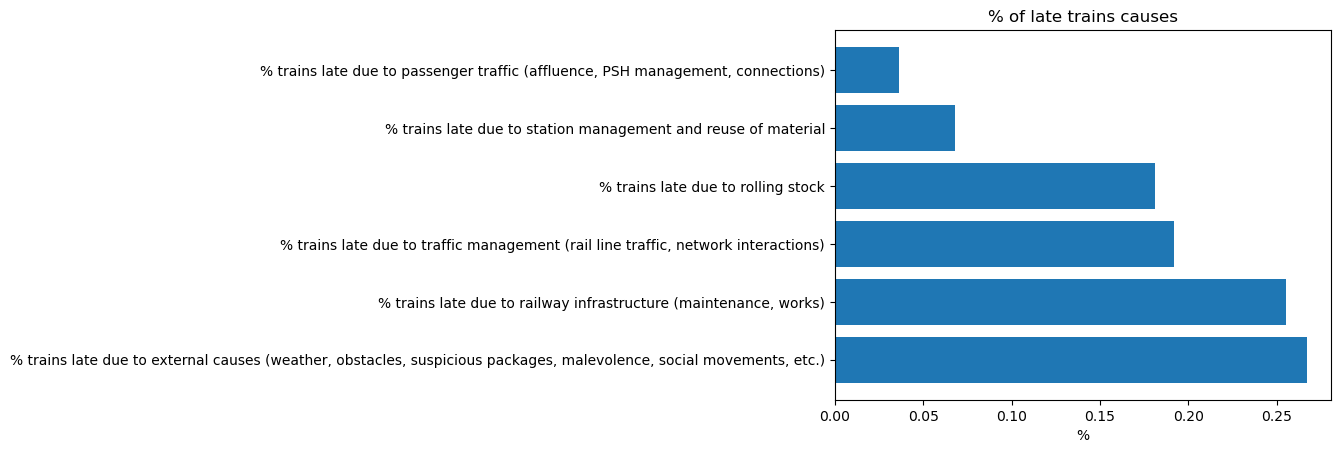

In [60]:
# Plot shows percentage of trains late due to a specific reason
plt.barh(all_columns, total_percentage)
plt.title('% of late trains causes')
plt.xlabel('%')
plt.show()

### Answer to the question
Most trains are late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)